In [180]:
# load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [181]:
#importing the dataset
#from google.colab import files
#uploaded = files.upload()

In [182]:
# loading the data
data = names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', names=names, delim_whitespace=True)
print(data)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [183]:
# Analyze the dataset

In [184]:
# shape
print(data.shape)

(506, 14)


In [185]:
# types
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [186]:
# describe
print(data.describe(include='all'))

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [187]:
# Data Visualizations

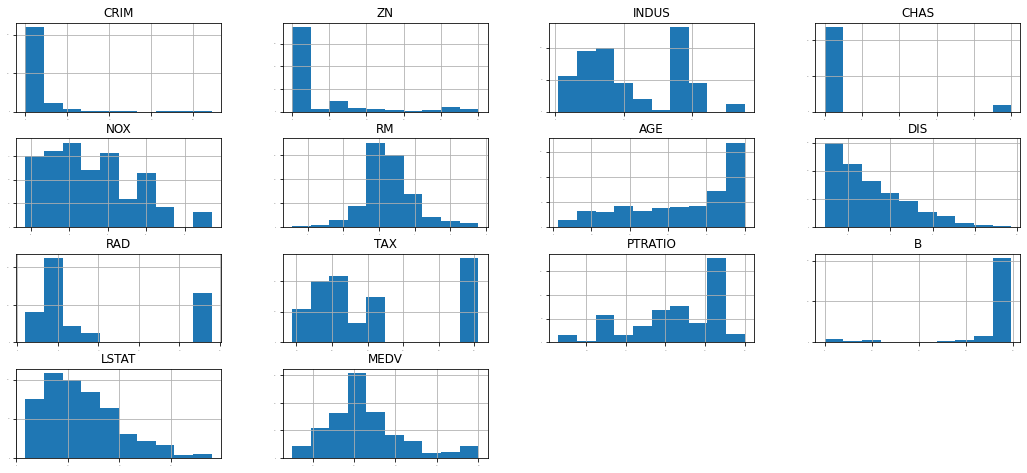

In [188]:
# histogram
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.rcParams['figure.figsize'] = [18, 8]
plt.show()

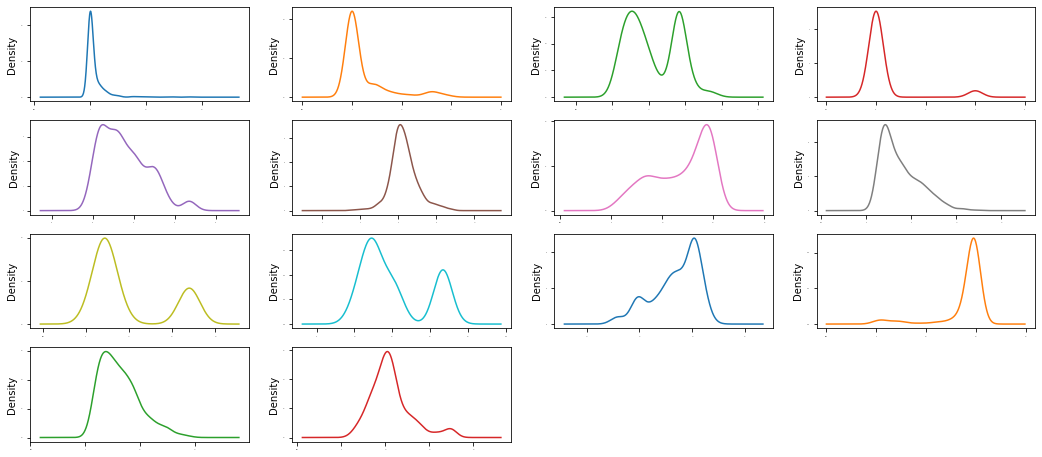

In [189]:
# density
data.plot(kind= 'density' , subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

In [190]:
# Split out the validation dataset
array = data.values
X = array[:, 0:13]
Y = array[:, 13]
seed = 42
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed) 

In [191]:
# Test options and evaluation metric
num_folds = 7
scoring = 'neg_mean_squared_error'

In [192]:
# Spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('svm', SVR()))

In [193]:
# Evaluate each model
results = []
names = []
for name, model in models:
  kfold  = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f (%f)'% (name, cv_results.mean(), cv_results.std())
  print(msg)

LR : -24.485402 (6.590195)
LA : -28.657990 (4.877841)
EN : -28.687992 (4.593440)
DTR : -20.293558 (7.209282)
KNR : -46.827777 (13.958512)
svm : -71.424763 (13.196008)


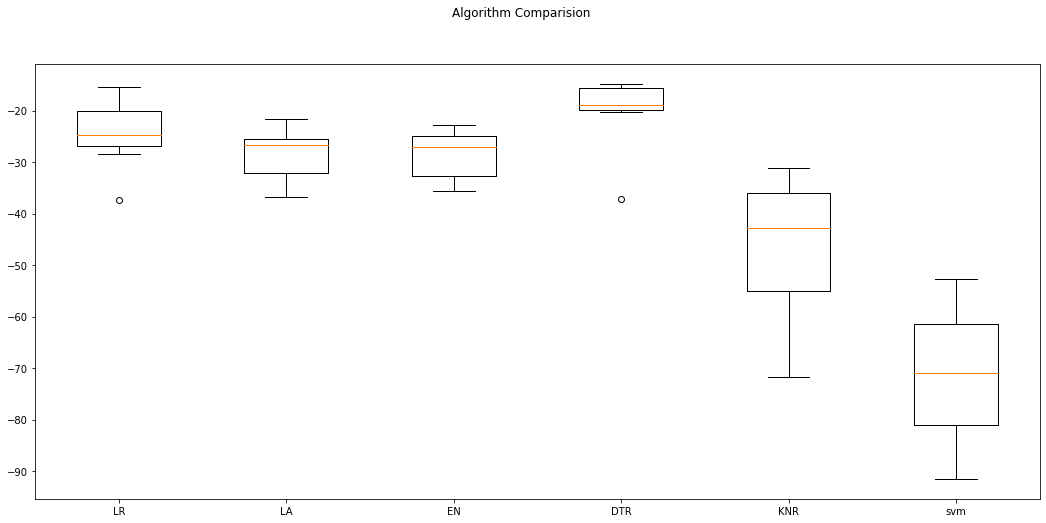

In [194]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [195]:
# Standardize the dataset using the pipelines
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scalar', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLA', Pipeline([('Scalar', StandardScaler()), ('LA', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scalar', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledDTR', Pipeline([('Scalar', StandardScaler()), ('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledKNR', Pipeline([('Scalar', StandardScaler()), ('KNR', KNeighborsRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scalar', StandardScaler()), ('SVM', SVR())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f (%f)'% (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR : -24.485402 (6.590195)
ScaledLA : -29.402128 (5.925919)
ScaledEN : -30.617303 (5.564479)
ScaledDTR : -20.393659 (7.464370)
ScaledKNR : -24.505252 (6.699742)
ScaledSVM : -32.135396 (7.409746)


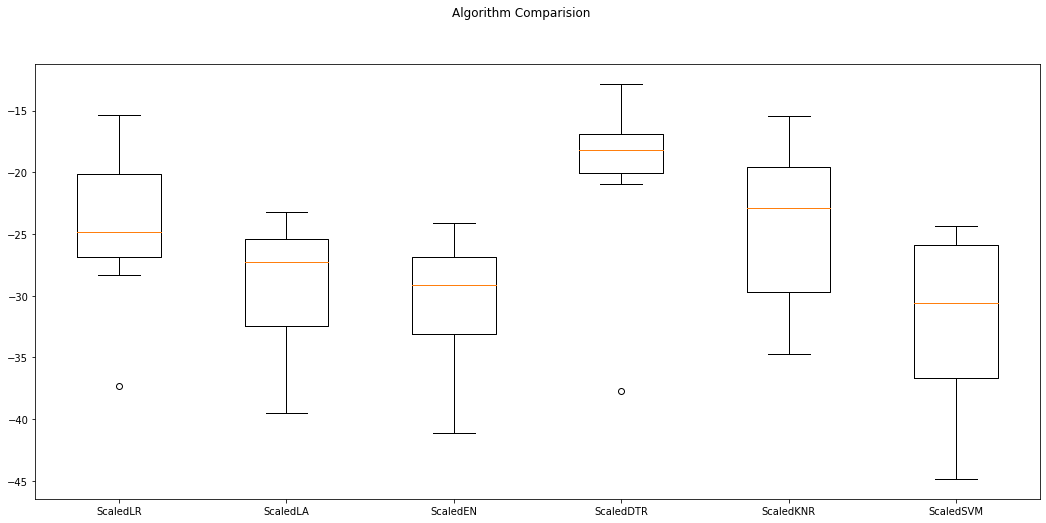

In [196]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [197]:
# KNN Algorithms Tuning
scalar = StandardScaler()
rescaled_x = scalar.fit_transform(x_train)
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state = seed)
grid = GridSearchCV(estimator=model, cv=kfold, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaled_x, y_train) 
print('Best: %f using %s\n'%(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print('%f (%f) with : %s'%(mean, std, param))

Best: -20.885989 using {'n_neighbors': 1}

-20.885989 (6.476238) with : {'n_neighbors': 1}
-21.092002 (7.786278) with : {'n_neighbors': 3}
-23.450559 (5.636590) with : {'n_neighbors': 5}
-24.811490 (5.987297) with : {'n_neighbors': 7}
-24.209870 (4.214010) with : {'n_neighbors': 9}
-24.271221 (3.993026) with : {'n_neighbors': 11}
-24.175543 (4.535667) with : {'n_neighbors': 13}
-24.489704 (4.619208) with : {'n_neighbors': 15}
-24.978400 (4.456764) with : {'n_neighbors': 17}
-25.239314 (4.415665) with : {'n_neighbors': 19}
-25.964404 (4.609968) with : {'n_neighbors': 21}


In [198]:
# Ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scalar', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGB', Pipeline([('Scalar', StandardScaler()), ('GB', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scalar', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scalar', StandardScaler()), ('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results= cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f (%f)'%(name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB : -17.140268 (4.894436)
ScaledGB : -11.076982 (3.412648)
ScaledRF : -12.954152 (4.675850)
ScaledET : -11.210048 (4.068748)


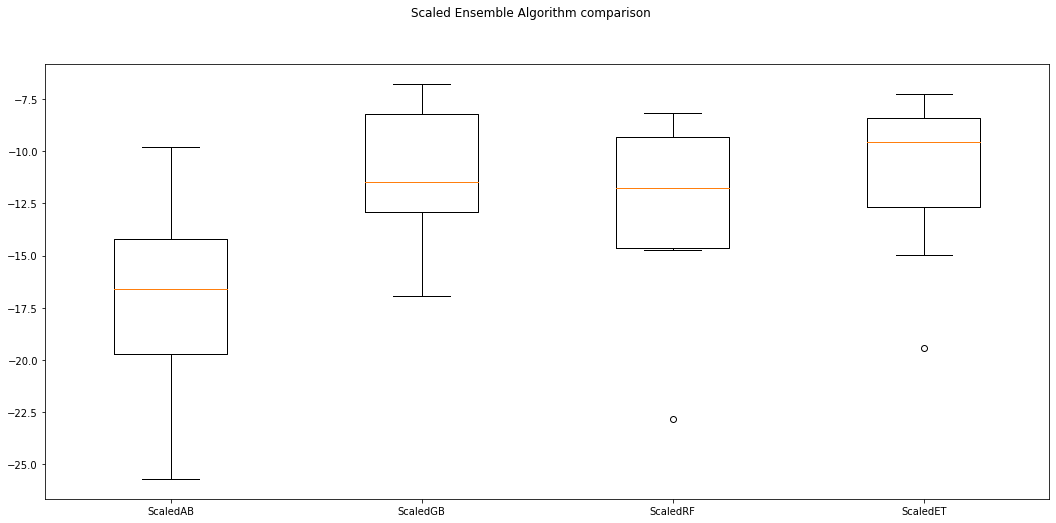

In [199]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm comparison')
ax =fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [200]:
# Tune Scaled GB
scalar = StandardScaler()
rescaled_x = scalar.fit_transform(x_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, scoring=scoring, cv=kfold, param_grid=param_grid)
grid_result = grid.fit(rescaled_x, y_train)

In [201]:
print('Best: %f using %s\n'%(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
  print('%f (%f) with %s'%(mean, std, param))

Best: -10.879482 using {'n_estimators': 350}

-11.495159 (3.129925) with {'n_estimators': 50}
-10.960466 (3.342701) with {'n_estimators': 100}
-11.009755 (3.713005) with {'n_estimators': 150}
-10.896944 (3.676466) with {'n_estimators': 200}
-11.165702 (3.899097) with {'n_estimators': 250}
-10.889120 (4.007728) with {'n_estimators': 300}
-10.879482 (3.994803) with {'n_estimators': 350}
-11.124165 (4.228308) with {'n_estimators': 400}
-11.127332 (3.994944) with {'n_estimators': 450}
-11.130674 (3.908170) with {'n_estimators': 500}


In [202]:
# prepare the model
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaled_x, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [203]:
# transform the validation dataset
rescaled_valdation_x = scaler.fit_transform(x_test)
predictions = model.predict(rescaled_valdation_x)
print(mean_squared_error(y_test, predictions))

7.583299409698982


In [204]:
print(predictions)

[21.2045884  34.83199556 14.61128637 24.19241326 19.08421262 20.30444704
 18.29404558 13.03151792 20.93974185 21.79823279 18.21240236 16.37470557
  8.90836612 21.89689029 19.58118766 26.99638617 17.73321334  9.30055652
 45.94981554 15.06970276 28.47337797 27.95517112 14.40014497 25.09896274
 15.77195889 15.2442513  21.45821193 13.01614927 16.43151193 21.5393564
 18.29669024 25.48289256 21.20543883 22.15815822 16.15609264 17.98480248
 32.20050619 23.82516948 21.42795324 22.68047761 19.12371258 33.54983098
 49.62278032 18.93547713 25.0765821  16.2283326  16.39366614 24.36843216
 19.33576905 29.87716119 17.90487659 38.10772501 17.21551321 27.2732366
 47.40575523 23.27423347 18.07732419 33.71268495 24.68114398 17.40730415
 27.68066712 44.9634965  32.25705271 19.83915122 26.55619346 15.33221796
 14.6943846  24.64151603 29.70287566 15.77227796 21.24987159 26.34363441
 11.37397356 22.90669474 22.24282061  6.8833062  16.15557199 46.93621012
 11.52706179 11.16194512 21.48346858 12.65196762 19.2